In [2]:
import pandas as pd

In [6]:
df = pd.read_excel("../Data/dataproject2024.xlsx")

In [9]:
df.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


In [54]:
from sklearn.metrics import classification_report, balanced_accuracy_score

# Generate the classification report
report = classification_report(df["Default (y)"], df["Pred_default (y_hat)"])
print("Classification Report:\n", report)

# Calculate the balanced accuracy
balanced_acc = balanced_accuracy_score(df["Default (y)"], df["Pred_default (y_hat)"])
print("Balanced Accuracy:", balanced_acc)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5945
           1       0.70      0.41      0.52      1485

    accuracy                           0.85      7430
   macro avg       0.78      0.68      0.71      7430
weighted avg       0.83      0.85      0.83      7430

Balanced Accuracy: 0.682846406311503


# EDA

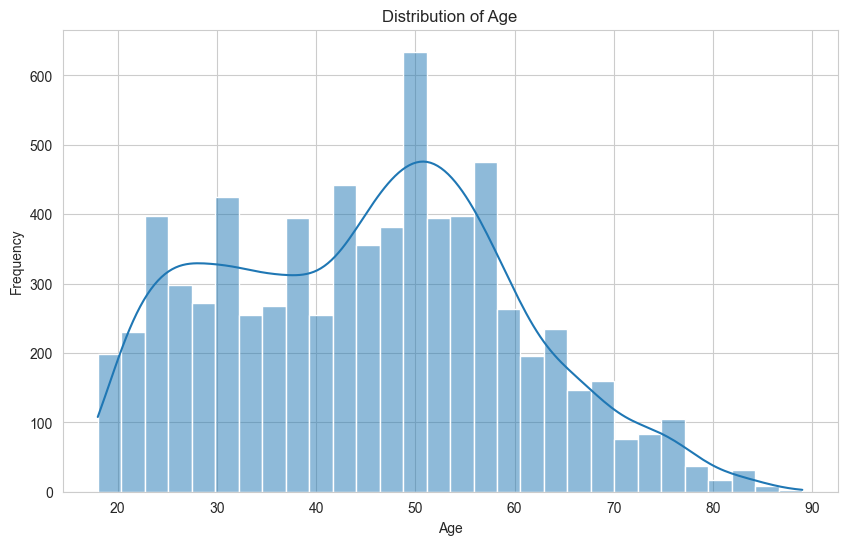

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


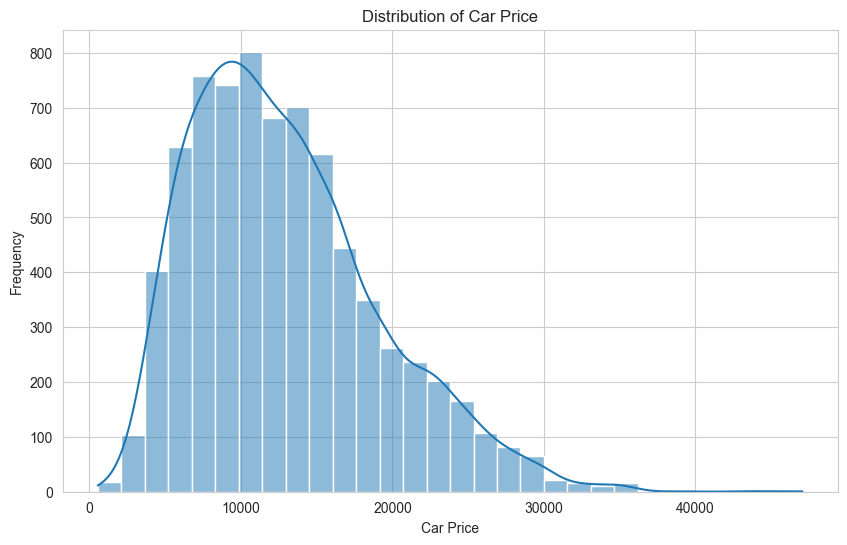

In [11]:
# Plot the distribution of 'Car price'
plt.figure(figsize=(10, 6))
sns.histplot(df["Car price"], bins=30, kde=True)
plt.title("Distribution of Car Price")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.show()


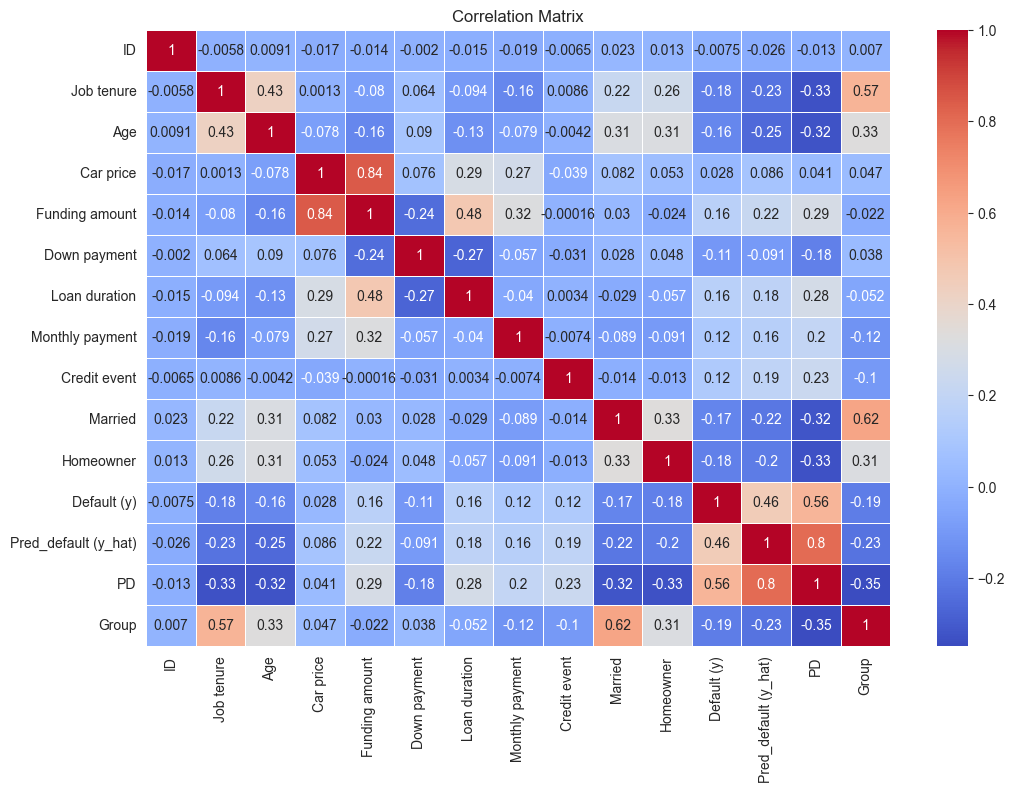

In [12]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


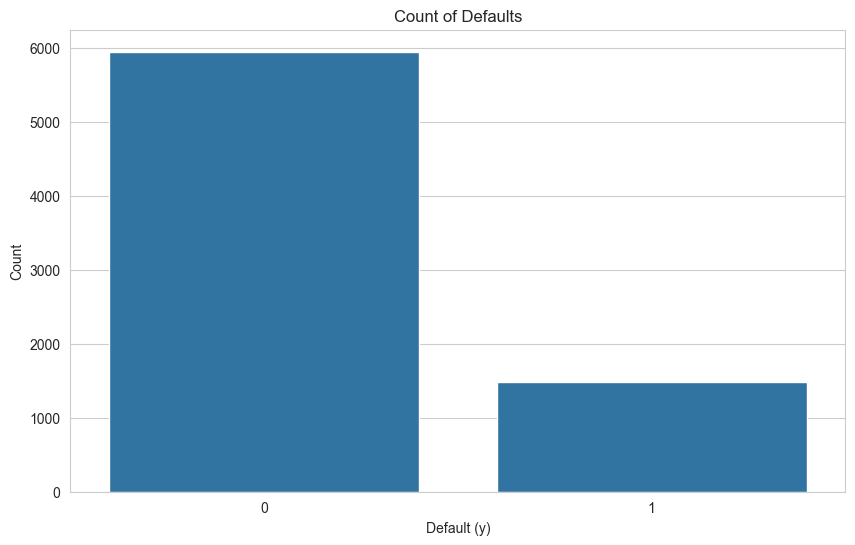

In [13]:
# Plot the count of defaults
plt.figure(figsize=(10, 6))
sns.countplot(x="Default (y)", data=df)
plt.title("Count of Defaults")
plt.xlabel("Default (y)")
plt.ylabel("Count")
plt.show()


In [14]:
# Check for null values by column
null_values = df.isnull().sum()
print(null_values)

ID                      0
Job tenure              0
Age                     0
Car price               0
Funding amount          0
Down payment            0
Loan duration           0
Monthly payment         0
Credit event            0
Married                 0
Homeowner               0
Default (y)             0
Pred_default (y_hat)    0
PD                      0
Group                   0
dtype: int64


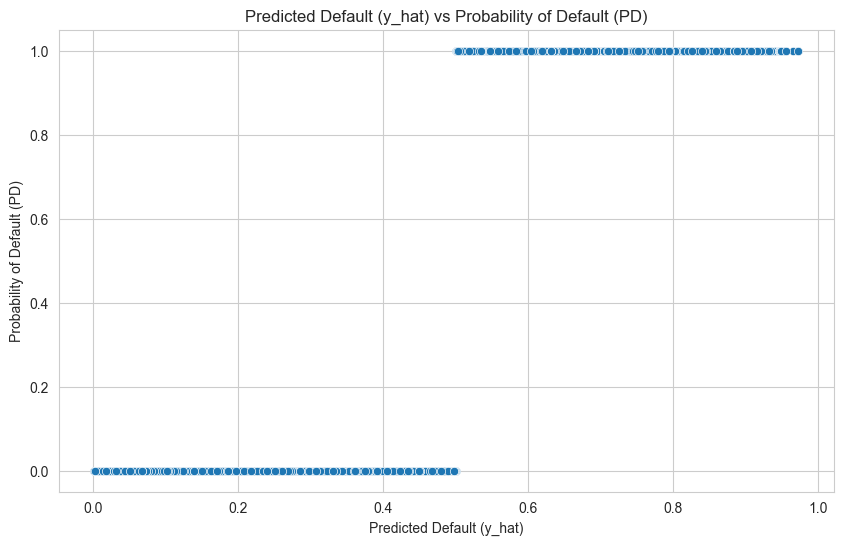

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PD", y="Pred_default (y_hat)", data=df)
plt.title("Predicted Default (y_hat) vs Probability of Default (PD)")
plt.xlabel("Predicted Default (y_hat)")
plt.ylabel("Probability of Default (PD)")
plt.show()

# Modeling

In [86]:
# Define the feature matrix X and the target variable y
X = df.drop(columns=["Default (y)", "Pred_default (y_hat)", "PD", "Group", "ID"])
y = df["Default (y)"]

# Display the first few rows of X and y to verify
print(X.head())
print(y.head())

   Job tenure  Age  Car price  Funding amount  Down payment  Loan duration  \
0          34   55       4875            3087             0             36   
1           5   29      13000           13000             0             60   
2          14   38      17190           14190             0             60   
3          16   37      22773           23568             0             48   
4           1   61       7700            8526             0             48   

   Monthly payment  Credit event  Married  Homeowner  
0         0.047895             0        1          1  
1         0.091667             0        0          0  
2         0.088235             0        0          0  
3         0.110084             0        1          1  
4         0.123404             0        1          0  
0    0
1    1
2    0
3    0
4    1
Name: Default (y), dtype: int64


In [87]:
# Feature engineering

# Monthly payment to income ratio
X["Monthly payment to income ratio"] = X["Monthly payment"] / (
    X["Funding amount"] + 1e-9
)  # Adding a small value to avoid division by zero

# Loan to car price ratio
X["Loan to car price ratio"] = X["Funding amount"] / (
    X["Car price"] + 1e-9
)  # Adding a small value to avoid division by zero


# Interaction terms between job tenure, age, and monthly payment
X["Job tenure * Age"] = X["Job tenure"] * X["Age"]
X["Job tenure * Monthly payment"] = X["Job tenure"] * X["Monthly payment"]
X["Age * Monthly payment"] = X["Age"] * X["Monthly payment"]


# Display the first few rows of the updated DataFrame to verify
print(X.head())


   Job tenure  Age  Car price  Funding amount  Down payment  Loan duration  \
0          34   55       4875            3087             0             36   
1           5   29      13000           13000             0             60   
2          14   38      17190           14190             0             60   
3          16   37      22773           23568             0             48   
4           1   61       7700            8526             0             48   

   Monthly payment  Credit event  Married  Homeowner  \
0         0.047895             0        1          1   
1         0.091667             0        0          0   
2         0.088235             0        0          0   
3         0.110084             0        1          1   
4         0.123404             0        1          0   

   Monthly payment to income ratio  Loan to car price ratio  Job tenure * Age  \
0                         0.000016                 0.633231              1870   
1                         0.0000

In [88]:
from sklearn.model_selection import train_test_split

# Perform a stratified split to maintain the class distribution in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shapes of the resulting datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5944, 15)
X_test shape: (1486, 15)
y_train shape: (5944,)
y_test shape: (1486,)


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.5846338348440956


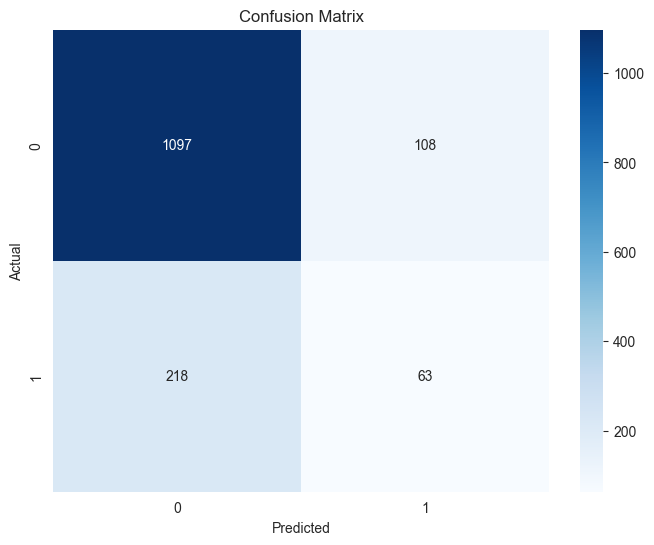

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1205
           1       0.37      0.22      0.28       281

    accuracy                           0.78      1486
   macro avg       0.60      0.57      0.57      1486
weighted avg       0.75      0.78      0.76      1486



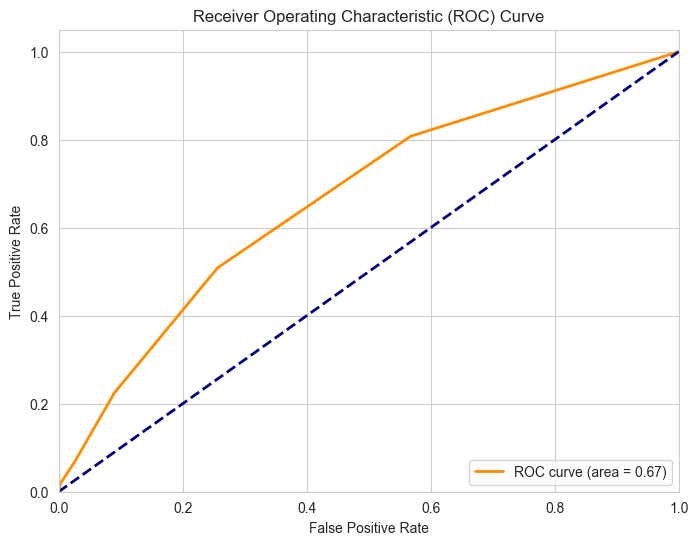

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Balanced Accuracy (XGBoost): 0.6090368218206739


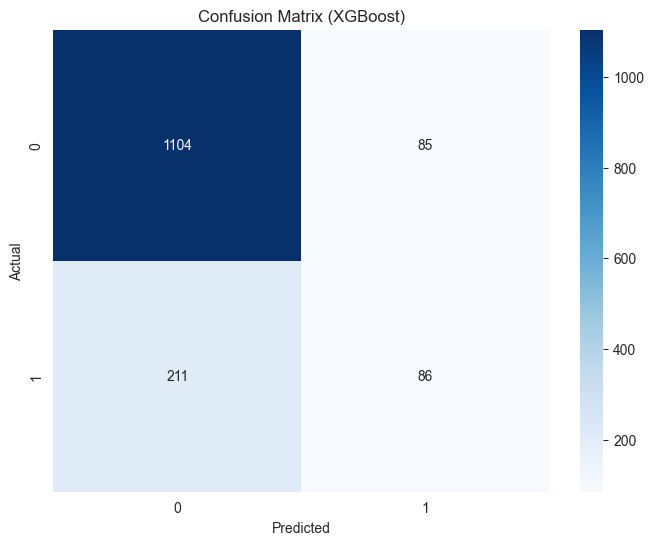

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1189
           1       0.50      0.29      0.37       297

    accuracy                           0.80      1486
   macro avg       0.67      0.61      0.62      1486
weighted avg       0.77      0.80      0.78      1486



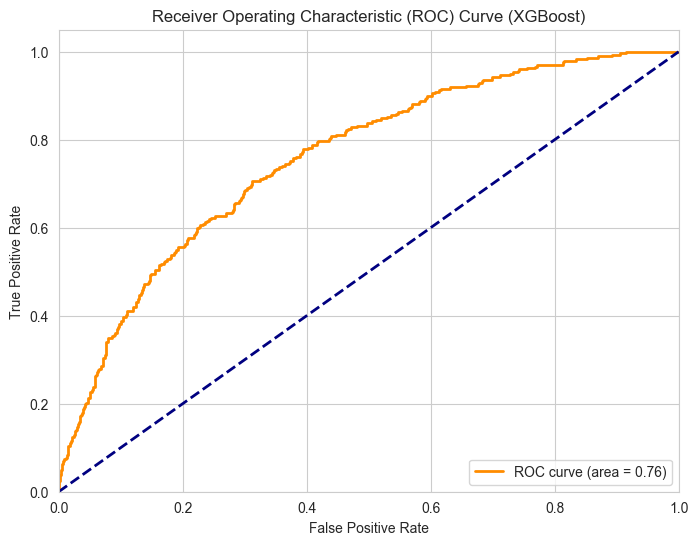

In [89]:
import xgboost as xgb
from sklearn.metrics import (
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=True, eval_metric="logloss")

# Train the XGBoost classifier
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate the balanced accuracy
balanced_acc_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
print("Balanced Accuracy (XGBoost):", balanced_acc_xgb)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# ROC Curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_xgb,
    tpr_xgb,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_xgb,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (XGBoost)")
plt.legend(loc="lower right")
plt.show()

Balanced Accuracy (Random Forest): 0.5985898022769894


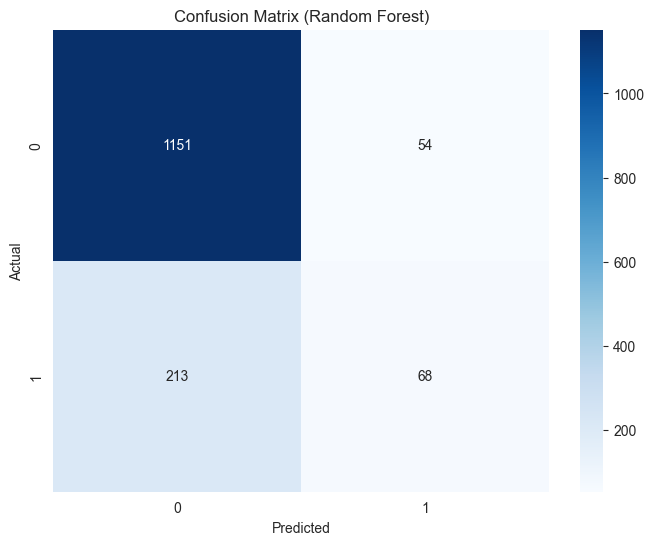

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1205
           1       0.56      0.24      0.34       281

    accuracy                           0.82      1486
   macro avg       0.70      0.60      0.62      1486
weighted avg       0.79      0.82      0.79      1486



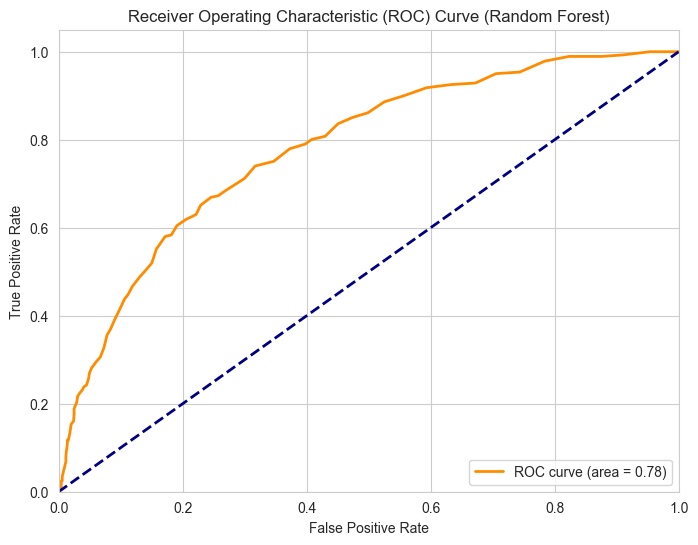

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate the balanced accuracy
balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print("Balanced Accuracy (Random Forest):", balanced_acc_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(
    "Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf)
)

# ROC Curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf,
    tpr_rf,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_rf,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (Random Forest)")
plt.legend(loc="lower right")
plt.show()

In [99]:
import optuna


# Define the objective function for Optuna
def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical(
            "grow_policy", ["depthwise", "lossguide"]
        )
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical(
            "sample_type", ["uniform", "weighted"]
        )
        param["normalize_type"] = trial.suggest_categorical(
            "normalize_type", ["tree", "forest"]
        )
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    # Split the data
    X_train_2, X_valid, y_train_2, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
    class_weights = {0: 1, 1: len(y_train) / sum(y_train)}
    # Train the model
    model = xgb.XGBClassifier(
        **param, use_label_encoder=False, class_weights=class_weights
    )
    model.fit(X_train_2, y_train_2)

    # Predict on the validation set
    y_pred = model.predict(X_valid)

    # Calculate the balanced accuracy
    balanced_acc = balanced_accuracy_score(y_valid, y_pred)
    return balanced_acc


In [100]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [101]:
# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best parameters
print("Best parameters:", study.best_params)
print("Best balanced accuracy:", study.best_value)


[I 2024-09-24 16:53:06,384] A new study created in memory with name: no-name-b94f2942-d196-44c5-9ee4-bd7d97e3f340
[I 2024-09-24 16:53:07,613] Trial 0 finished with value: 0.5351841051878165 and parameters: {'booster': 'dart', 'lambda': 1.9238489148187102e-07, 'alpha': 0.00014050923729146746, 'max_depth': 7, 'eta': 0.011359138367824727, 'gamma': 1.535965684999352e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 3.7153748903196464e-05, 'skip_drop': 6.75667119500326e-08}. Best is trial 0 with value: 0.5351841051878165.
[I 2024-09-24 16:53:07,647] Trial 1 finished with value: 0.5152294356228296 and parameters: {'booster': 'gblinear', 'lambda': 9.50391894582295e-05, 'alpha': 0.049256431960210775}. Best is trial 0 with value: 0.5351841051878165.
[I 2024-09-24 16:53:07,801] Trial 2 finished with value: 0.5939700801456229 and parameters: {'booster': 'gbtree', 'lambda': 1.7133628075335415e-08, 'alpha': 1.588994587726273e-05, 'max_depth': 7, 'eta'

Best parameters: {'booster': 'gbtree', 'lambda': 2.300832767055616e-06, 'alpha': 5.487406430042806e-07, 'max_depth': 8, 'eta': 0.6973729455446251, 'gamma': 0.011196223085902813, 'grow_policy': 'lossguide'}
Best balanced accuracy: 0.6170815329286289


Balanced Accuracy (Best Model): 0.6077837528636519


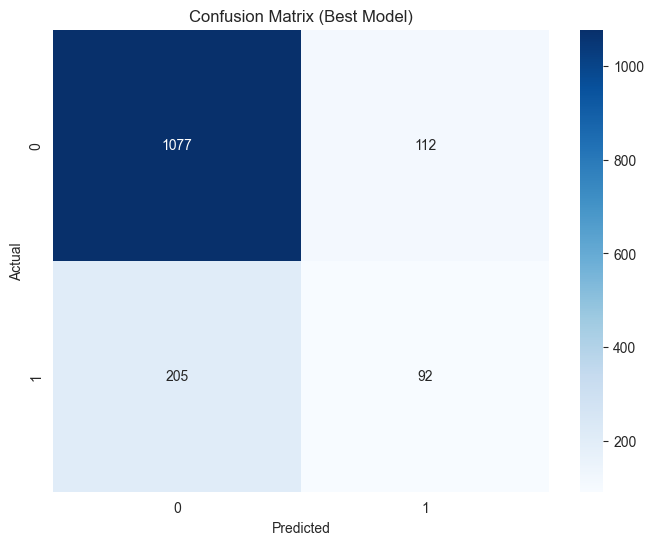

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1189
           1       0.45      0.31      0.37       297

    accuracy                           0.79      1486
   macro avg       0.65      0.61      0.62      1486
weighted avg       0.76      0.79      0.77      1486



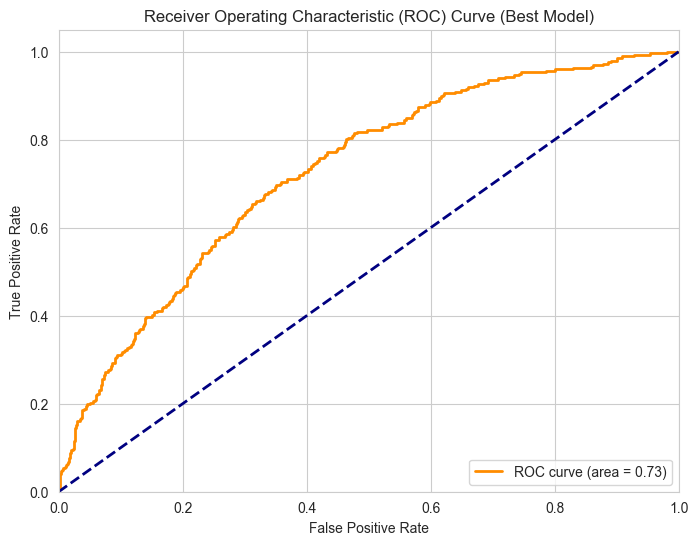

In [102]:
# Train the best model using the best parameters from the Optuna study with class imbalance weights

best_params = study.best_params
# Calculate class weights
best_model = xgb.XGBClassifier(
    **best_params, use_label_encoder=False, eval_metric="logloss"
)

# Train the model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_best = best_model.predict(X_test)

# Calculate the balanced accuracy
balanced_acc_best = balanced_accuracy_score(y_test, y_pred_best)
print("Balanced Accuracy (Best Model):", balanced_acc_best)

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(
    "Classification Report (Best Model):\n", classification_report(y_test, y_pred_best)
)

# ROC Curve and AUC
fpr_best, tpr_best, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc_best = auc(fpr_best, tpr_best)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_best,
    tpr_best,
    color="darkorange",
    lw=2,
    label="ROC curve (area = %0.2f)" % roc_auc_best,
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (Best Model)")
plt.legend(loc="lower right")
plt.show()


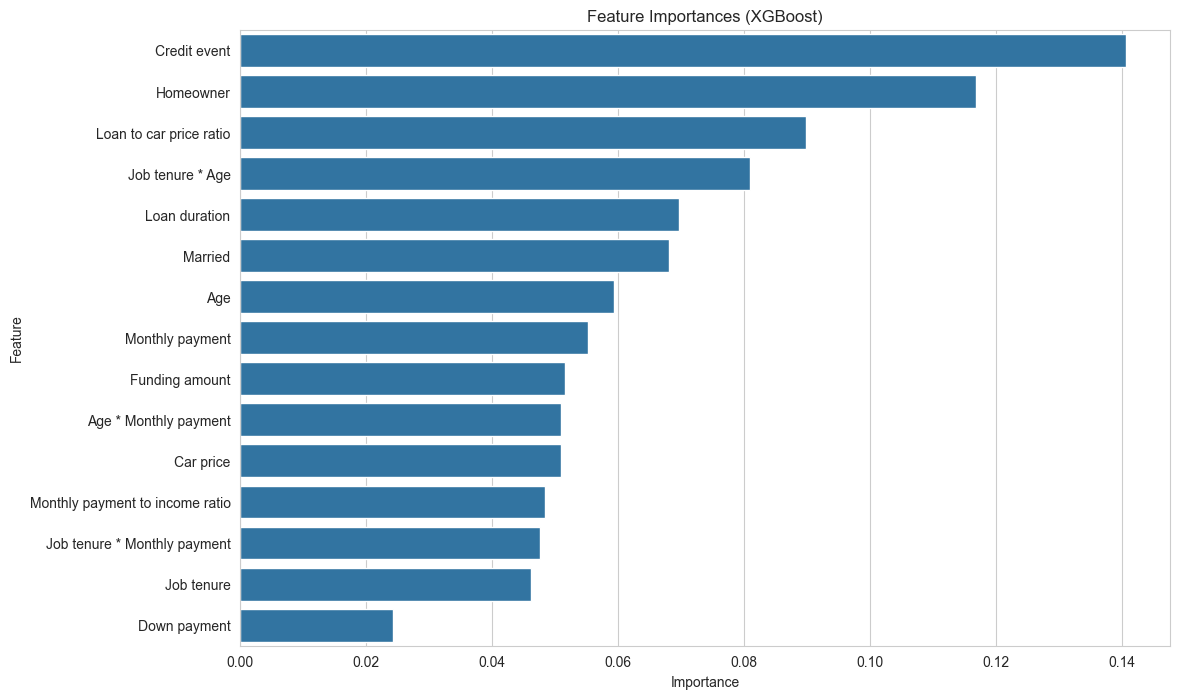

In [103]:
# Calculate feature importances for the XGBoost model
importances_xgb = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_xgb = pd.DataFrame(
    {"Feature": X.columns, "Importance": importances_xgb}
)

# Sort the DataFrame by importance
feature_importances_xgb = feature_importances_xgb.sort_values(
    by="Importance", ascending=False
)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importances_xgb)
plt.title("Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [104]:
# Predict on the entire dataset
y_pred_all = best_model.predict(X)

# Calculate the balanced accuracy
balanced_acc_all = balanced_accuracy_score(y, y_pred_all)
print("Balanced Accuracy (Best Model on Entire Dataset):", balanced_acc_all)

Balanced Accuracy (Best Model on Entire Dataset): 0.9215567505727303
